# **Import**

In [1]:
import glob
import numpy as np
import pandas as pd
import geopandas as gp 
import matplotlib.pyplot as plt
from astropy.io import fits
from scipy.optimize import curve_fit
from astropy.time import Time
from astropy.coordinates import get_sun
from datetime import datetime


import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Flatten, Input , Conv1D, Conv1DTranspose, MaxPooling1D, UpSampling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard, LambdaCallback, EarlyStopping

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc, roc_curve, confusion_matrix

In [2]:
grb = ["Data_firmware_2/2021-08-07_10-05-18_exp4s_sbin4/ch0/part1/rate_multi_ch.txt",
"Data_firmware_2/2021-08-22_09-16-56_exp4s_sbin4/ch0/part1/rate_multi_ch.txt",
"Data_firmware_2/2021-09-09_09-25-05_exp4s_sbin4/ch0/part2/rate_multi_ch.txt",
"Data_firmware_2/2021-10-18_22-22-36_exp1s_sbin4/ch0/part1/rate_multi_ch.txt",
"Data_firmware_2/2021-10-18_22-22-36_exp1s_sbin4/ch0/part2/rate_multi_ch.txt"]

# **Load data**

In [3]:
start = datetime.now()
uno = glob.glob("Data/GRBalpha/Data_firmware_2/*-*-*_*-*-*_exp*s_sbin*/ch0/part*/rate_multi_ch.txt")
dos = glob.glob("Data/GRBalpha/Data_firmware_3/*-*-*_*-*-*_exp*s_sbin*/ch0/rate_multi_ch.txt")
data = np.sort(dos)
X, y = [],[]
fill = []
for fname in data:
    if fname in grb:
        skip
    else:
        with open(fname) as file:
            lines = file.readlines()
            for line in lines[9:]:
                split = line[:-1].split()      
                #times = [split[2]+' '+split[3], split[4]+' '+split[5]]
                #t = Time(times, format='iso', scale='utc')
                #sun = get_sun(t)
                if np.isnan(float(split[16])) == True:
                    X.append([(float(split[10])+ float(split[7]))/2,
                              (float(split[11])+ float(split[8]))/2])
                else:
                    X.append([(float(split[10])+ float(split[7]))/2,
                              (float(split[11])+ float(split[8]))/2])

                y.append(np.log10((float(split[-1]))+1))
                fill.append(fname)


            
#(float(t.jd[0])+ float(t.jd[1]))/2
end = datetime.now()
print(len(uno),len(dos))
print("Number of files:",len(data))
print("Number of points:",len(X))
print("Elapsed", (end - start).total_seconds())

df = pd.DataFrame(data = X, columns=["log","lat"])
print("lat")
print("min",min(df["lat"]))
print("max",max(df["lat"]))
print("log")
print("min",min(df["log"]))
print("max",max(df["log"]))

522 55
Number of files: 55
Number of points: 550179
Elapsed 5.875418
lat
min -82.52695
max 82.52715
log
min 0.012173495
max 359.9905


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420)

In [5]:
model = Sequential()
model.add(Input(2,))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.01),
              loss="mean_squared_error")

conv_callback = [EarlyStopping(monitor='val_loss', patience=5)]
#TensorBoard(log_dir = "./logs/conv/{}-{}-{}-{}".format(datetime.datetime.today().month,datetime.datetime.today().day,datetime.datetime.today().hour,datetime.datetime.today().minute), update_freq="epoch"
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                96        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 2,241
Trainable params: 2,241
Non-trainable params: 0
_________________________________________________________________


2022-12-13 18:05:13.634225: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-13 18:05:13.634284: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-13 18:05:13.634315: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mch): /proc/driver/nvidia/version does not exist
2022-12-13 18:05:13.634565: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-12-13 18:05:19.196479: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
806/806 [==============================] - 3s 3ms/step - loss: 6.7020 - val_loss: 0.3209
Epoch 2/100
806/806 [==============================] - 1s 951us/step - loss: 0.2923 - val_loss: 0.2746
Epoch 3/100
806/806 [==============================] - 1s 959us/step - loss: 0.2779 - val_loss: 0.2767
Epoch 4/100
806/806 [==============================] - 1s 951us/step - loss: 0.2739 - val_loss: 0.3406
Epoch 5/100
806/806 [==============================] - 1s 975us/step - loss: 0.2734 - val_loss: 0.2685
Epoch 6/100
806/806 [==============================] - 1s 1ms/step - loss: 0.2696 - val_loss: 0.2348
Epoch 7/100
806/806 [==============================] - 1s 948us/step - loss: 0.2490 - val_loss: 0.2989
Epoch 8/100
806/806 [==============================] - 1s 947us/step - loss: 0.2335 - val_loss: 0.2545
Epoch 9/100
806/806 [==============================] - 1s 939us/step - loss: 0.2021 - val_loss: 0.1874
Epoch 10/100
806/806 [==============================] - 1s 1ms/step - loss: 0

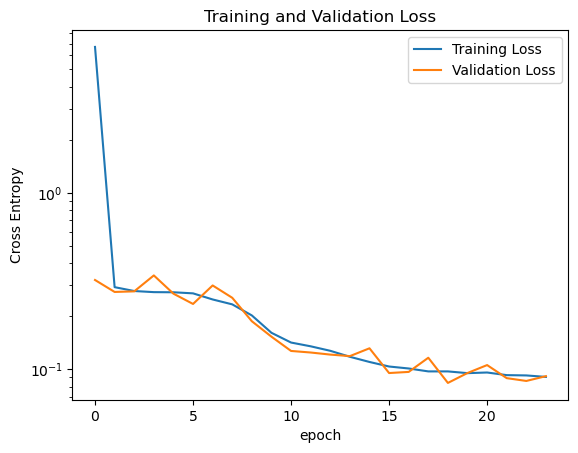

In [6]:
history = model.fit(X_train, y_train,
          validation_data = (X_test, y_test),
          batch_size=512, epochs=100, callbacks=[conv_callback])

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.yscale("log")
plt.show()

In [7]:
y_pred = model.predict(X_test)
y_pred

array([[2.09557  ],
       [2.3926759],
       [2.6072264],
       ...,
       [3.8674994],
       [2.6252084],
       [2.0975988]], dtype=float32)

In [8]:
print(np.median(y))
print(np.mean(y))
print(np.median(y_pred))
print(np.mean(y_pred))

2.387982127432
2.694695385324923
2.4000468
2.6675565


In [9]:
dff = pd.DataFrame(X_test,columns=["log","lat"])

In [10]:
world = gp.read_file(gp.datasets.get_path('naturalearth_lowres'))

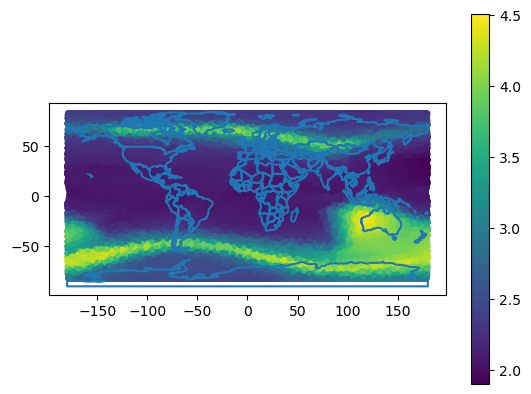

In [11]:
world.boundary.plot()
plt.scatter(dff["log"]-180,dff["lat"],c=y_pred,marker=".")
plt.colorbar()


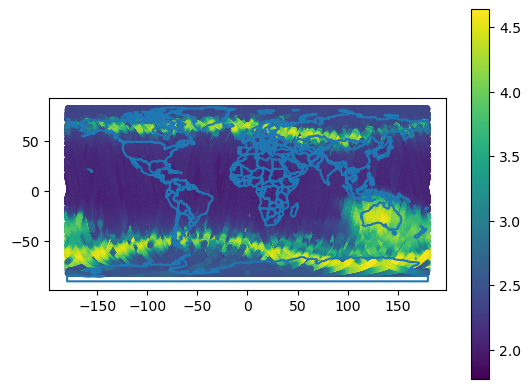

In [12]:
world.boundary.plot()
plt.scatter(df["log"]-180,df["lat"],c=y,marker=".")
plt.colorbar()

In [13]:
yy_pred = -1+10**(y_pred.reshape(-1))
yy_test = -1+10**(np.array(y_test))

(array([1.51000e+02, 9.37000e+02, 1.63900e+03, 2.33900e+03, 3.40800e+03,
        5.97900e+03, 1.16825e+05, 5.12500e+03, 1.06700e+03, 7.50000e+01]),
 array([-38067.90600586, -32311.55817871, -26555.21035156, -20798.86252441,
        -15042.51469727,  -9286.16687012,  -3529.81904297,   2226.52878418,
          7982.87661133,  13739.22443848,  19495.57226563]),
 <BarContainer object of 10 artists>)

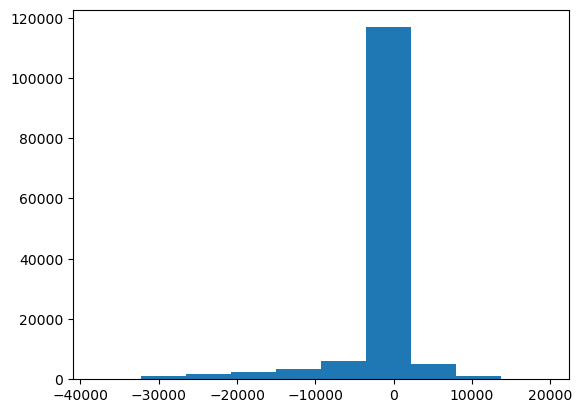

In [14]:
plt.hist(yy_pred-yy_test)

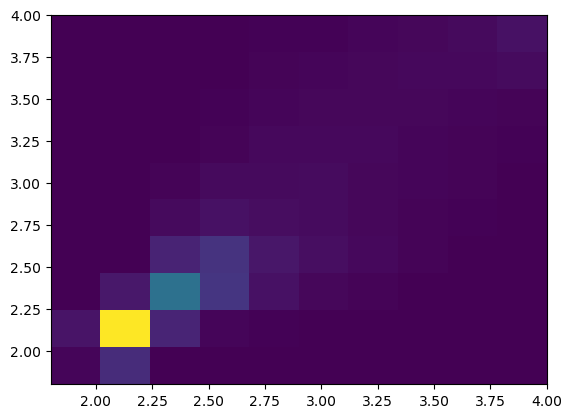

In [15]:
plt.hist2d((y_pred.reshape(-1)), y_test,range=[[1.8,4],[1.8,4]]);

(array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        2.7500e+02, 1.7090e+03, 1.2616e+04, 2.1797e+04, 9.8360e+03,
        8.9820e+03, 1.0047e+04, 5.7050e+03, 7.8590e+03, 5.3230e+03,
        3.7360e+03, 3.3400e+03, 2.8460e+03, 2.6390e+03, 2.4020e+03,
        2.4630e+03, 2.2450e+03, 2.1590e+03, 1.9000e+03, 1.7960e+03,
        1.8550e+03, 1.7520e+03, 1.7300e+03, 1.6620e+03, 1.6570e+03,
        1.6940e+03, 1.8680e+03, 2.0340e+03, 2.4810e+03, 3.4030e+03,
        1.9860e+03, 1.5230e+03, 1.5690e+03, 1.4780e+03, 7.0800e+02,
        3.2600e+02, 1.3700e+02, 7.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00]),
 array([1.5       , 1.57142857, 1.64285714, 1.71428571, 1.78571429,
        1.85714286, 1.92857143, 2.        , 2.07142857, 2.14285714,
        2.21428571, 2.28571429, 2.35714286, 2.42857143, 2.5       ,
        2.57142857, 2.64285714, 2.71428571, 2.78571429, 2.85714286,
        2.92857143, 3.        , 3.07142857, 3.14285714, 3.

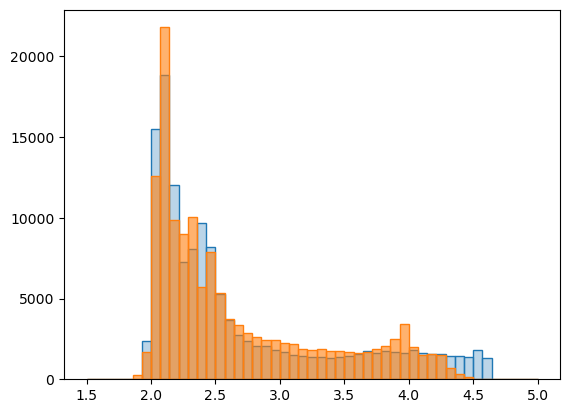

In [16]:
lightblue = (142/255, 186/255, 217/255, 0.6)
lightorange = (255/255, 127/255, 14/255, 0.6)

kw1 = {"fc" : lightblue,
           "edgecolor" : "C0",
           "color" : None}

kw2 = {"fc" : lightorange,
            "edgecolor" : "C1",
            "color" : None}
bins = np.linspace(1.5,5,50)
plt.hist(y_test,bins=bins, **kw1)
plt.hist(y_pred,bins=bins, **kw2)